In [1]:
#make the code as Python 3 compatible as possible
from __future__ import print_function, division, absolute_import

import pypsa

import numpy as np

import pandas as pd

import os
#import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams.update({"font.weight": "bold",'font.size': 18})
%matplotlib inline

220 - r/km- 0.08, x/km-0.32
400 - r/km-0.05, x/km- 0.5
132- r/km-0.15, x/km - 0.1898

In [2]:
#working floder = "dry" or "wet"

working_folder = "dry"

csv_folder_name = "Data_Folder/Eastern_grid_data/" + working_folder + "_season_data"
result_folder = "Data_Folder/Eastern_grid_data/"+ working_folder + "_results/"

fig_size = (12,6)

network = pypsa.Network()
network.import_from_csv_folder(csv_folder_name)

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 19, 3], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network dry_season_data has buses, generators, lines, loads, storage_units, transformers


<AxesSubplot:xlabel='snapshot'>

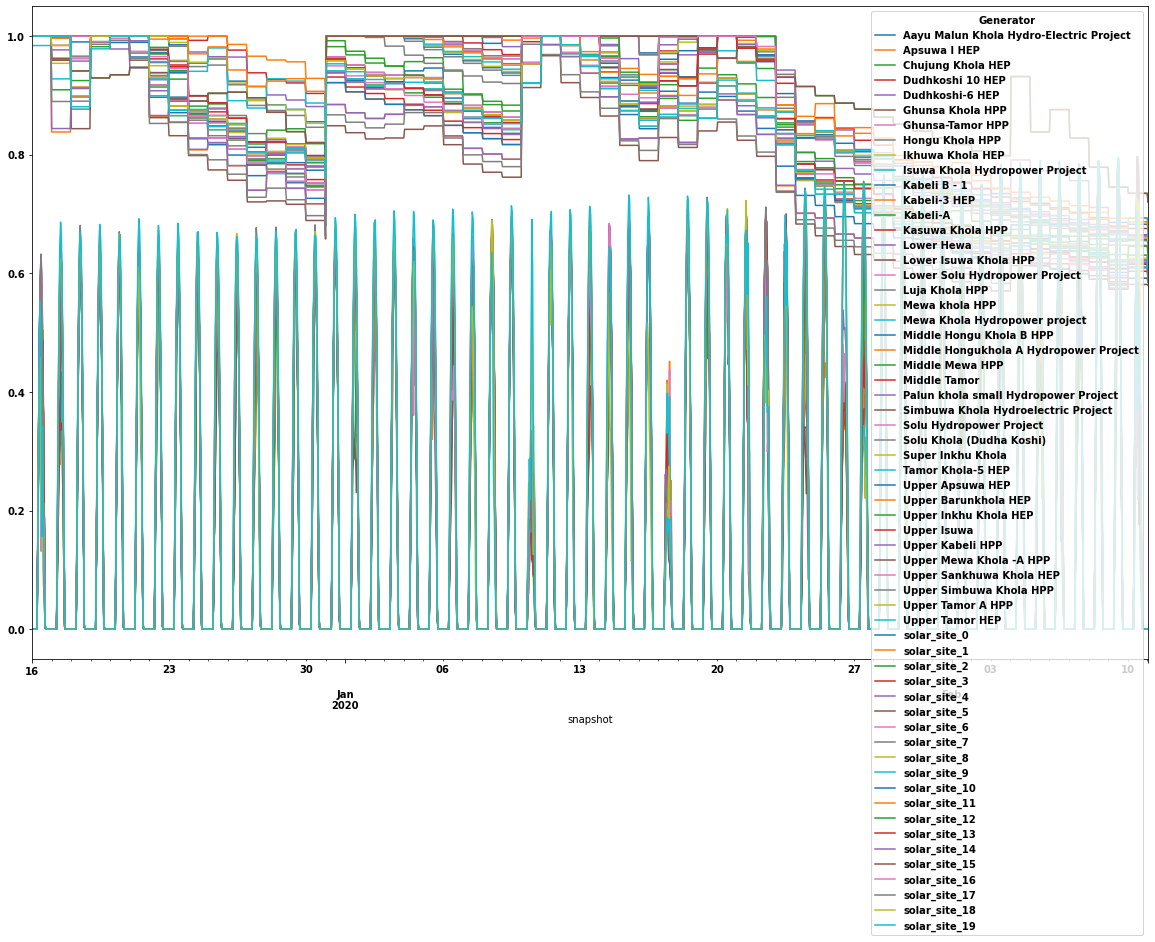

In [4]:
fig,ax = plt.subplots( figsize=(20,12))
network.generators_t.p_max_pu.plot(ax=ax)

In [92]:
from adjustText import adjust_text

p_value = pd.DataFrame()
p_value['x'] = network.buses.x.to_list()
p_value['y'] = network.buses.y.to_list()
p_value['name'] = network.buses.index.to_list()
for i in range(len(p_value)):
    p_value.name[i] = p_value.name[i].rstrip('0123456789_')
p_value = p_value[~p_value.name.duplicated(keep='first')]

/tmp/ipykernel_14142/3028915040.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
x_values = p_value.x.to_list()
y_values = p_value.y.to_list()
names = p_value.name.to_list()

def Show_text():
    texts = []
    for i in range(len(x_values)):
        texts.append(plt.text(x_values[i], y_values[i], names[i]))

    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

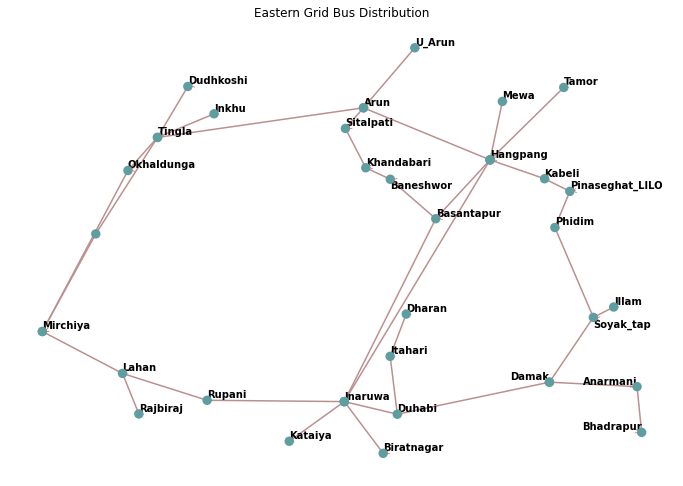

In [22]:
fig,ax = plt.subplots( figsize=(12,12))

network.plot(bus_sizes=0.0002,ax=ax,title="Eastern Grid Bus Distribution")

Show_text()


#plt.savefig("network.pdf")
plt.show()

In [23]:
#Performing non-linear PF on results of LOPF, performs power flow for every hour
#info = network.pf()

In [5]:
now = network.snapshots[0]
network.pf(now)

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2019-12-16'], dtype='datetime64[ns]', name='snapshot', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.061885 seconds


{'n_iter': SubNetwork  0
 snapshot     
 2019-12-16  4,
 'error': SubNetwork             0
 snapshot                
 2019-12-16  2.070522e-10,
 'converged': SubNetwork     0
 snapshot        
 2019-12-16  True}

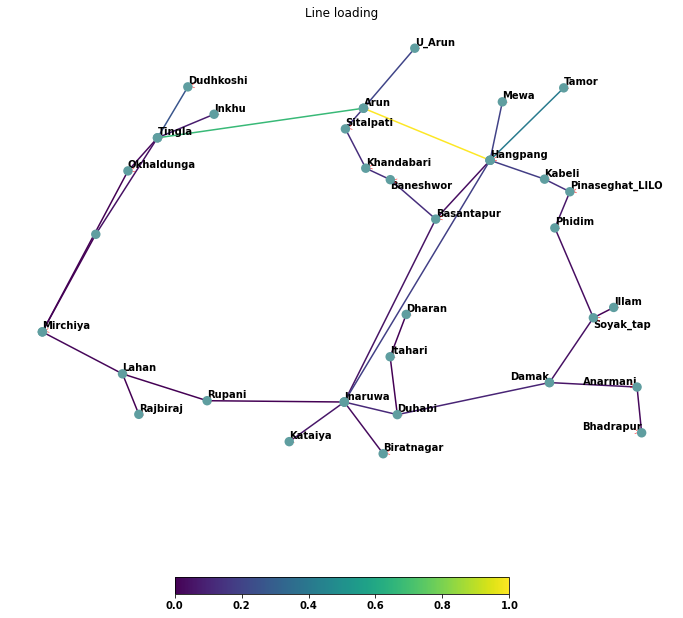

In [114]:
#loading for the first snapshot

loading = network.lines_t.p0.iloc[0]
fig,ax = plt.subplots( figsize=(12,12))
cmap = matplotlib.colormaps['viridis']
im = network.plot(bus_sizes=0.0002,ax=ax,line_colors=abs(loading),line_cmap=cmap,title="Line loading")
cbar = plt.colorbar(im[1],location = 'bottom',shrink = 0.5)
Show_text()

<AxesSubplot:xlabel='Generator'>

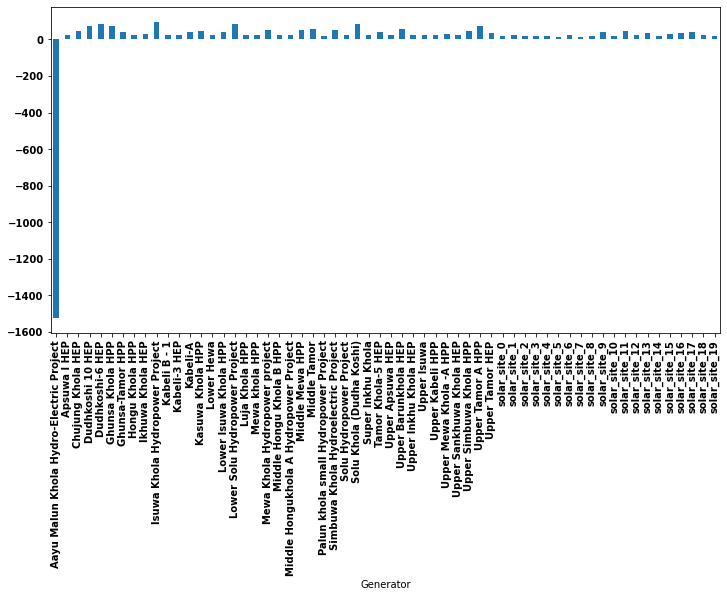

In [6]:
#active power generation for first snapshot
fig,ax = plt.subplots(1,1)

fig.set_size_inches(fig_size)
network.generators_t.p.iloc[0].plot.bar()
#plt.savefig(result_folder+'load_flow_power.png')

,bus,control,p_nom,p_set,carrier,sub_dist,road_dist,type,p_nom_extendable,p_nom_min,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Apsuwa I HEP,Arun_400,Slack,23.000000,23.000000,Hydro,10.281444,8.703194,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Aayu Malun Khola Hydro-Electric Project,Okhaldunga_132,PV,21.000000,21.000000,Hydro,12.425811,0.405554,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Chujung Khola HEP,U_Arun_400,PV,48.000000,48.000000,Hydro,19.830118,0.212139,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Dudhkoshi 10 HEP,Dudhkoshi_4_400,PV,75.000000,75.000000,Hydro,6.654686,1.045683,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Dudhkoshi-6 HEP,Dudhkoshi_4_400,PV,83.000000,83.000000,Hydro,5.754689,1.585558,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ghunsa Khola HPP,Tamor_220,PV,71.500000,71.500000,Hydro,4.784431,4.160077,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ghunsa-Tamor HPP,Tamor_220,PV,43.000000,43.000000,Hydro,1.105625,0.469875,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Hongu Khola HPP,Inkhu_132,PV,21.870000,21.870000,Hydro,23.053013,7.003191,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ikhuwa Khola HEP,U_Arun_400,PV,30.000000,30.000000,Hydro,4.730713,4.715104,,False,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


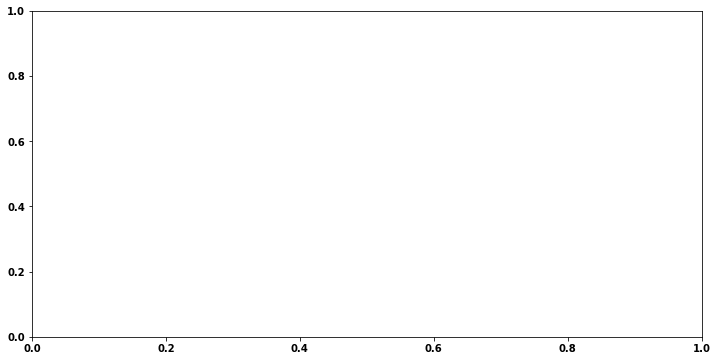

In [115]:
#voltage profile for the load flow at time first snapshot

fig,ax = plt.subplots(1,1)

fig.set_size_inches(fig_size)
network.generators

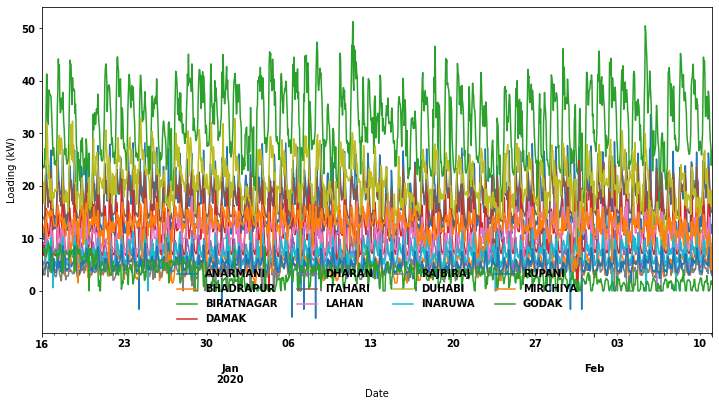

In [100]:
#loading data plotting

fig,ax = plt.subplots(1,1)
fig.set_size_inches(fig_size)

(network.loads_t.p_set).plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Loading (kW)")
ax.legend(loc='lower center',frameon=False, ncol=4)
plt.savefig(result_folder+'load_t.png')

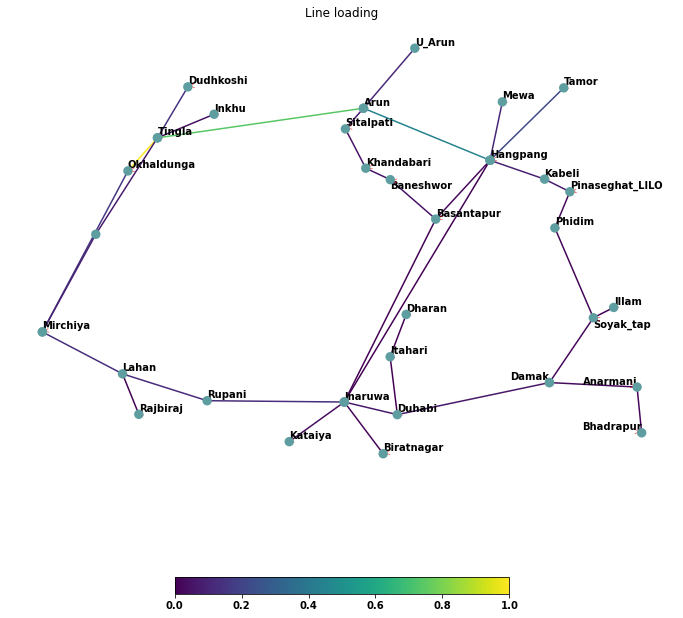

In [101]:
#loading for the first snapshot

loading = network.lines_t.p0.iloc[0]
fig,ax = plt.subplots( figsize=(12,12))
cmap = matplotlib.colormaps['viridis']
im = network.plot(bus_sizes=0.0002,ax=ax,line_colors=abs(loading),line_cmap=cmap,title="Line loading")
cbar = plt.colorbar(im[1],location = 'bottom',shrink = 0.5)
Show_text()

In [102]:
#active power for first snapshot
fig,ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(12,12))

q = network.buses_t.q.iloc[0]
bus_colors = pd.Series("r",network.buses.index)
bus_colors[q< 0.] = "b"

network.plot(bus_sizes=0.5e-5*abs(q),ax=ax,bus_colors=bus_colors,
             title="Reactive power feed-in (red=+ve, blue=-ve)");

NameError: name 'ccrs' is not defined

In [14]:
(network.generators_t.p.iloc[0].sum() - network.loads_t.p_set.iloc[0].sum())/network.generators_t.p.iloc[0].sum()
network.generators_t.p.iloc[0].sum()

159.85993017502832

In [ ]:
fig.tight_layout()
#fig.savefig('load-distribution.png')

In [ ]:
network.generators.groupby("carrier")["p_nom"].sum()

In [ ]:
network.storage_units.groupby("carrier")["p_nom"].sum()

## Run Linear Optimal Power Flow for wet and dry seaon of 2019

In [35]:
#working floder = "dry" or "wet"

working_folder = "wet"

csv_folder_name = "Eastern_grid_data/" + working_folder + "_season_data"
result_folder = "Eastern_grid_data/"+ working_folder + "_results/"

fig_size = (12,6)

network = pypsa.Network()
network.import_from_csv_folder(csv_folder_name)

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 19, 3], imported network file PyPSA version [0, 18, 1].

INFO:pypsa.io:Imported network wet_season_data has buses, generators, lines, loads, storage_units, transformers


In [36]:
network.loads_t.p_set = network.loads_t.p_set

In [37]:
#to approximate n-1 security and allow room for reactive power flows,
#don't allow any line to be loaded above 70% of their thermal rating

contingency_factor = 0.8

network.lines.s_max_pu = contingency_factor


In [38]:
network.lines["s_nom_original"] = network.lines.s_nom

network.lines.s_nom_extendable = True
network.lines.s_nom_min = network.lines.s_nom


In [39]:
group_size = 2
solver_name = "glpk"
for i in range(int(len(network.snapshots)/group_size)):
    network.lopf(network.snapshots[group_size*i:group_size*i+group_size],
                 solver_name=solver_name,
                 keep_files=True,formulation = 'ptdf')
    network.lines.s_nom = network.lines.s_nom_opt

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmp8rw4hte1.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpsm579x47.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmpdvm65ia3.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.052153587341308594
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

INFO:pypsa.opf:Building pyomo model using `ptdf` formulation
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmprl4wo18h.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmphpwbjxv0.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmpbb_4e786.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04730653762817383
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpgpw_1h0q.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmphz6w94np.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmppmdr8p8g.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.046216726303100586
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpdfmd4x8k.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpftedku7e.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmph3wapbjr.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.056256771087646484
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmp7ol5b1gx.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpucl6a6hr.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmp7okh1o0i.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.062233686447143555
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpyo4yhm4k.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmp6jkc7ynq.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmp6lqq55sp.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.051161766052246094
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpv677a75s.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpelbm0nji.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmpc7ndd906.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.05357003211975098
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpr_n7gko2.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpno4er0ef.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmp1uyfuym3.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04377007484436035
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpwkav3gv1.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmp8hdud0l5.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmpp2i77noc.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.05048537254333496
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpgrvrywp5.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpwzhopeqf.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmpq6p339kx.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04574775695800781
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpb76zixf3.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpakwp6ruh.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmp23svkl82.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.06068730354309082
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

INFO:pypsa.opf:Building pyomo model using `ptdf` formulation
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpdhah3ug0.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpfp31t6m1.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmp3sl8pead.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0829010009765625
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmph4dvurgh.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpznlgefkl.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmph5kbstph.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04118084907531738
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmp92zvugkh.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpel62cn8c.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmphy9q8kmr.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `ptdf` formulation


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04209113121032715
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:322: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
INFO:pypsa.opf:Solving model using glpk


Solver log file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmpn30ewthn.glpk.log'
Solver solution file: 'C:\Users\ELECTR~1\AppData\Local\Temp\tmp3_sehhjf.glpk.raw'
Solver problem files: ('C:\\Users\\ELECTR~1\\AppData\\Local\\Temp\\tmpu7vxm3uy.pyomo.lp',)


INFO:pypsa.opf:Optimization successful
C:\Users\Electrical\.conda\envs\mixing\lib\site-packages\pypsa\opf.py:1971: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.concat(
INFO:pypsa.opf:Performed preliminary steps


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 271
  Number of variables: 235
  Number of nonzeros: 3422
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04385972023010254
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

INFO:pypsa.opf:Building pyomo model using `ptdf` formulation

KeyboardInterrupt



In [13]:
p_by_carrier = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum()
load_total = pd.DataFrame()
load_total.index = network.snapshots
load_total['Total System Load'] = network.loads_t.p_set.sum(numeric_only=True,axis=1)
print("hydro_sharing", p_by_carrier.Hydro.max())
print("solar_sharing",p_by_carrier.Solar.max())
print("total max system load",load_total['Total System Load'].max())

hydro_sharing 418.29948224000003
solar_sharing 191.0019341888662
total max system load 418.29948224


In [14]:
colors = {"Hydro" : "brown","Solar":"red"}
            
#reorder
cols =['Hydro','Solar']
p_by_carrier = p_by_carrier[cols]

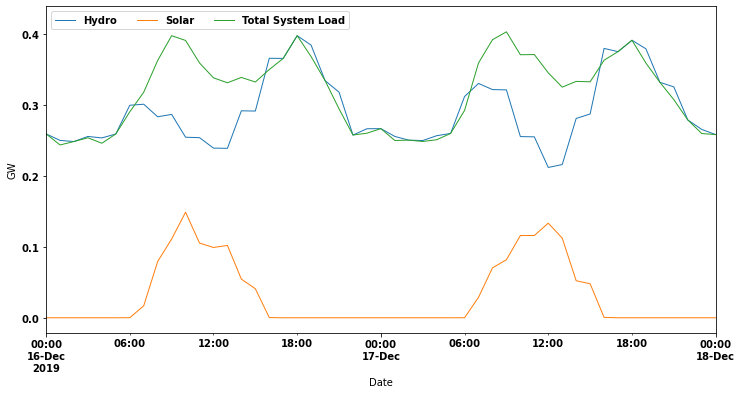

In [15]:
fig,ax = plt.subplots(1,1)

fig.set_size_inches(12,6)

(abs(p_by_carrier/1e3)).plot(kind="line",ax=ax,linewidth=1)
(load_total/1e3).plot(kind="line",ax=ax,linewidth=1)

ax.legend(ncol=4,loc="upper left")

ax.set_ylabel("GW")

ax.set_xlabel("Date")
ax.set_xlim(pd.Timestamp('2019-12-16'), pd.Timestamp('2019-12-18'))
plt.show()

In [80]:
#fig,ax = plt.subplots(1,1)
#fig.set_size_inches(12,6)

#p_storage = network.storage_units_t.p.sum(axis=1)
#state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
#p_storage.plot(label="Pumped hydro dispatch",ax=ax,linewidth=3)
#state_of_charge.plot(label="State of charge",ax=ax,linewidth=3)

#ax.legend()
#ax.grid()
#ax.set_ylabel("MWh")
#ax.set_xlabel("")
#ax.set_xlim(pd.Timestamp('2019-06-15'), pd.Timestamp('2019-06-17'))

In [81]:
now = network.snapshots[10]

## Look at variable curtailment

In [83]:
carrier = "Solar"

capacity = network.generators.groupby("carrier").sum().at[carrier,"p_nom"]

In [84]:
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])

In [85]:
p_available_by_carrier =p_available.groupby(network.generators.carrier, axis=1).sum()

In [86]:
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier

In [87]:
p_curtailed_by_carrier.Solar.max()

286.30202894572994

In [88]:
p_df = pd.DataFrame({carrier + " available" : p_available_by_carrier[carrier],
                     carrier + " dispatched" : p_by_carrier[carrier],
                     carrier + " curtailed" : p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity

In [89]:
p_df["Solar curtailed"][p_df["Solar curtailed"] < 0.] = 0.

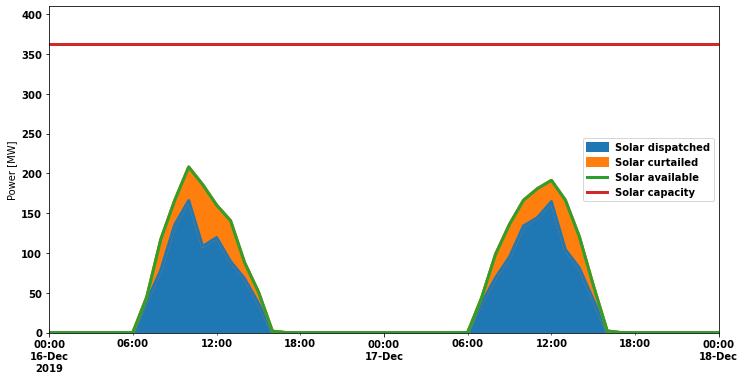

In [90]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)
p_df[[carrier + " dispatched",carrier + " curtailed"]].plot(kind="area",ax=ax,linewidth=3)
p_df[[carrier + " available",carrier + " capacity"]].plot(ax=ax,linewidth=3)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.set_ylim([0,410])
ax.set_xlim(pd.Timestamp('2019-12-16'), pd.Timestamp('2019-12-18'))
ax.legend()

In [123]:
fig.tight_layout()
#fig.savefig("scigrid-curtailment.png")

# Check power flow after opimization (optional)

In [124]:
now = network.snapshots[0]

In [125]:
for bus in network.buses.index:
    bus_sum = network.buses_t.p.loc[now,bus]
    branches_sum = 0
    for comp in ["lines","transformers"]:
        comps = getattr(network,comp)
        comps_t = getattr(network,comp+"_t")
        branches_sum += comps_t.p0.loc[now,comps.bus0==bus].sum() - comps_t.p0.loc[now,comps.bus1==bus].sum()

    if abs(bus_sum-branches_sum) > 1e-4:
        print(bus,bus_sum,branches_sum)

## Now perform a full Newton-Raphson power flow on the first hour

In [126]:
#For the PF, set the P to the optimised P
network.generators_t.p_set = network.generators_t.p_set.reindex(columns=network.generators.index)
network.generators_t.p_set = network.generators_t.p

network.storage_units_t.p_set = network.storage_units_t.p_set.reindex(columns=network.storage_units.index)
network.storage_units_t.p_set = network.storage_units_t.p

In [127]:

#set all buses to PV, since we don't know what Q set points are
network.generators.control = "PV"

#set slack
#network.generators.loc["1 Coal","control"] = "Slack"


#Need some PQ buses so that Jacobian doesn't break
f = network.generators[network.generators.bus == "492"]
network.generators.loc[f.index,"control"] = "PQ"

In [128]:

print("Performing non-linear PF on results of LOPF:")

info = network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2019-12-16 00:00:00', '2019-12-16 01:00:00',
               '2019-12-16 02:00:00', '2019-12-16 03:00:00',
               '2019-12-16 04:00:00', '2019-12-16 05:00:00',
               '2019-12-16 06:00:00', '2019-12-16 07:00:00',
               '2019-12-16 08:00:00', '2019-12-16 09:00:00',
               ...
               '2020-02-10 16:00:00', '2020-02-10 17:00:00',
               '2020-02-10 18:00:00', '2020-02-10 19:00:00',
               '2020-02-10 20:00:00', '2020-02-10 21:00:00',
               '2020-02-10 22:00:00', '2020-02-10 23:00:00',
               '2020-02-11 00:00:00', '2020-02-11 01:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=1370, freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.031286 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.028481 seconds
INFO:pypsa

Performing non-linear PF on results of LOPF:


INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.024159 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.027548 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.031376 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.019822 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.027690 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.028355 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.028386 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029371 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.026538 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030221 seconds
INFO:pypsa.pf:Newton-Raphson solved in 3 iteration

KeyboardInterrupt: 

In [129]:
#any failed to converge?
(~info.converged).any().any()

NameError: name 'info' is not defined

In [ ]:
network.snapshots

In [ ]:
network.snapshots[]

In [ ]:
#active power generation for first snapshot
fig,ax = plt.subplots(1,1)

fig.set_size_inches(fig_size)
network.generators_t.p.iloc[10].plot.bar()
plt.savefig(result_folder+'load_flow_power.png')

In [ ]:
print("With the non-linear load flow, there is the following per unit loading\nof the full thermal rating:")
print((network.lines_t.p0.loc[now]/network.lines.s_nom).describe())

In [ ]:
#Get voltage angle differences

df = network.lines.copy()

for b in ["bus0","bus1"]:
    df = pd.merge(df,network.buses_t.v_ang.loc[[now]].T,how="left",
         left_on=b,right_index=True)

s = df[str(now)+"_x"]- df[str(now)+"_y"]

In [ ]:
print("The voltage angle differences across the lines have (in degrees):")
print((s*180/np.pi).describe())

In [ ]:
#plot the reactive power

fig,ax = plt.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()})

fig.set_size_inches(11,11)

q = network.buses_t.q.loc[now]

bus_colors = pd.Series("r",network.buses.index)
bus_colors[q< 0.] = "b"


network.plot(bus_sizes=abs(q)*0.00002,ax=ax,bus_colors=bus_colors,title="Reactive power feed-in (red=+ve, blue=-ve)")


In [ ]:
fig.tight_layout()
#fig.savefig("reactive-power.png")

In [ ]:
network.generators_t.q.loc[now].sum()

In [ ]:
network.buses_t.q.loc[now].sum()

In [ ]:
network.loads